<b> 1. Comparing SVM, Random Forests, Linear Classifier and Neural Nets on MNIST</b><br/>
a. Implement all four algorithms to classify MNIST data using SkLearn. Use cross-validation to      evaluate the performance of the algorithms. Take a look at the possible parameter settings for these algorithms on SkLearn and obtain results by varying them. <br/>
b. Which algorithm (and the corresponding settings) performs best?<br/>
c. Which algorithm was easiest to tune?<br/>
d. Be sure to show the various hyperparameter settings you tried. <br/>
e. For each algorithm, describe what you learnt from the various experiment.<br/>


In [0]:
import matplotlib.pyplot as plt
import random
import numpy as np
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier as KNC
import time
import pandas as pd
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from IPython.display import display, HTML
from matplotlib.colors import ListedColormap
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [0]:
mnist = tf.keras.datasets.mnist
(train_data,train_labels),(test_data,test_labels) = mnist.load_data()
image_test = test_data
image_train = train_data
print("Number of training examples\t",len(train_data))
print("Shape of train_data\t\t",train_data.shape)
print("Shape of train_labels\t\t",train_labels.shape)

Number of training examples	 60000
Shape of train_data		 (60000, 28, 28)
Shape of train_labels		 (60000,)


In [0]:
# 5 points
# Flatten the train_data and test_data for faster computation.
train_len,train_row,train_col = train_data.shape
test_len,test_row,test_col = test_data.shape
train_data = train_data.reshape([train_len, train_row*train_col])
test_data = test_data.reshape([test_len, test_row*test_col])
# If the datatype of the above arrays is int8, convert them to float/int 32/64.
train_data = train_data.astype(np.float)
test_data = test_data.astype(np.float)
train_data = train_data/255.
test_data = test_data/255.
print("--After Flattening and converting datatype--")
print("Shape of train_data\t\t",train_data.shape)
print("Data type of train nparray\t",train_data.dtype)

--After Flattening and converting datatype--
Shape of train_data		 (60000, 784)
Data type of train nparray	 float64


In [0]:
#random forest
rfc_df = pd.DataFrame(columns=['n_estimators','n_jobs','criterion','max_depth','warm_start'])
rfc_df = rfc_df.append({'n_estimators':10,'n_jobs':10,'criterion':'gini','max_depth':30,'warm_start':False}, ignore_index=True)
rfc_df = rfc_df.append({'n_estimators':30,'n_jobs':10,'criterion':'gini','max_depth':30,'warm_start':False}, ignore_index=True)
rfc_df = rfc_df.append({'n_estimators':50,'n_jobs':10,'criterion':'gini','max_depth':30,'warm_start':False}, ignore_index=True)
rfc_df = rfc_df.append({'n_estimators':50,'n_jobs':10,'criterion':'entropy','max_depth':30,'warm_start':False}, ignore_index=True)
rfc_df = rfc_df.append({'n_estimators':50,'n_jobs':10,'criterion':'entropy','max_depth':30,'warm_start':True}, ignore_index=True)

In [0]:
for i,row in rfc_df.iterrows():
    random_forest = RandomForestClassifier(n_estimators=row['n_estimators'], n_jobs=row['n_jobs'],
                    criterion=row['criterion'],max_depth=row['max_depth'],warm_start=row['warm_start'])
    scores = cross_val_score(random_forest, train_data, train_labels, cv=10, scoring='accuracy')
    train_scores_mean = np.mean(scores)
    train_scores_std = np.std(scores)
    acc = str('%.4f' % train_scores_mean)+"+/-"+str('%.4f' % train_scores_std)
    print(acc)
    rfc_df.at[i,'Accuracy'] = acc

0.9448+/-0.0062
0.9622+/-0.0039
0.9652+/-0.0040
0.9642+/-0.0039
0.9647+/-0.0042


In [0]:
#Support Vector Machine
svm_df = pd.DataFrame(columns=['C','gamma','kernel','max_iter','degree'])

svm_df = svm_df.append({'C':1,'gamma': 0.01,'kernel':'rbf','max_iter':300,'degree':3}, ignore_index=True)
svm_df = svm_df.append({'C':10,'gamma':0.01,'kernel':'rbf','max_iter':300,'degree':3}, ignore_index=True)
svm_df = svm_df.append({'C':1,'gamma':'auto','kernel':'linear','max_iter':-1,'degree':3}, ignore_index=True)
svm_df = svm_df.append({'C':1,'gamma':'auto','kernel':'linear','max_iter':200,'degree':3}, ignore_index=True)
svm_df = svm_df.append({'C':5,'gamma':'auto','kernel':'poly','max_iter':700,'degree':2}, ignore_index=True)
svm_df = svm_df.append({'C':5,'gamma':'auto','kernel':'poly','max_iter':700,'degree':3}, ignore_index=True)

In [0]:
for i,row in svm_df.iterrows():
    svm = SVC(C=row['C'],gamma=row['gamma'],kernel=row['kernel'],max_iter=row['max_iter'],degree=row['degree'])
    scores = cross_val_score(svm, train_data, train_labels, cv=10, scoring='accuracy')
    train_scores_mean = np.mean(scores)
    train_scores_std = np.std(scores)
    acc = str('%.4f' % train_scores_mean)+"+/-"+str('%.4f' % train_scores_std)
    print(acc)
    svm_df.at[i,'Accuracy'] = acc

/home/owner/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/owner/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/owner/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/owner/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/owner/anac

0.9695+/-0.0045


/home/owner/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/owner/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/owner/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/owner/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/owner/anac

0.9794+/-0.0022
0.9341+/-0.0070


/home/owner/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/owner/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/owner/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/owner/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/owner/anac

0.7526+/-0.0200


/home/owner/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/owner/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/owner/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/owner/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/owner/anac

0.7530+/-0.0087


/home/owner/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/owner/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/owner/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/owner/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/owner/anac

0.3225+/-0.0203


In [0]:
#Linear Model
lc_df = pd.DataFrame(columns=['solver','max_iter','multi_class','n_jobs'])
lc_df = lc_df.append({'solver':'lbfgs','max_iter':50,'multi_class':'multinomial','n_jobs':10}, ignore_index=True)
lc_df = lc_df.append({'solver':'lbfgs','max_iter':100,'multi_class':'multinomial','n_jobs':10}, ignore_index=True)
lc_df = lc_df.append({'solver':'newton-cg','max_iter':100,'multi_class':'multinomial','n_jobs':10}, ignore_index=True)
lc_df = lc_df.append({'solver':'sag','max_iter':500,'multi_class':'multinomial','n_jobs':10}, ignore_index=True)

In [0]:
for i,row in lc_df.iterrows():
    linear_model = LogisticRegression(solver=row['solver'], max_iter=row['max_iter'], 
                                      multi_class=row['multi_class'], n_jobs=row['n_jobs'])
    scores = cross_val_score(linear_model, train_data, train_labels, cv=10, scoring='accuracy')
    train_scores_mean = np.mean(scores)
    train_scores_std = np.std(scores)
    acc = str('%.4f' % train_scores_mean)+"+/-"+str('%.4f' % train_scores_std)
    print(acc)
    lc_df.at[i,'Accuracy'] = acc

0.9200+/-0.0079
0.9205+/-0.0081
0.9205+/-0.0085
0.9205+/-0.0085


In [0]:
#neural network
mlp_df = pd.DataFrame(columns=['hidden_layer_sizes','activation','max_iter','alpha','solver','learning_rate_init'])
mlp_df = mlp_df.append({'hidden_layer_sizes':(100,),'activation':'identity','max_iter':200,'alpha':1e-4,'solver':'sgd','learning_rate_init':0.01}, ignore_index=True)
mlp_df = mlp_df.append({'hidden_layer_sizes':(100,),'activation':'relu','max_iter':200,'alpha':1e-4,'solver':'sgd','learning_rate_init':0.01}, ignore_index=True)
mlp_df = mlp_df.append({'hidden_layer_sizes':(30,),'activation':'relu','max_iter':200,'alpha':1e-4,'solver':'sgd','learning_rate_init':0.01}, ignore_index=True)
mlp_df = mlp_df.append({'hidden_layer_sizes':(100,),'activation':'relu','max_iter':100,'alpha':1e-4,'solver':'adam','learning_rate_init':0.01}, ignore_index=True)
mlp_df = mlp_df.append({'hidden_layer_sizes':(30,),'activation':'relu','max_iter':100,'alpha':1e-4,'solver':'adam','learning_rate_init':0.01}, ignore_index=True)
mlp_df = mlp_df.append({'hidden_layer_sizes':(100,),'activation':'logistic','max_iter':100,'alpha':1e-4,'solver':'lbfgs','learning_rate_init':0.01}, ignore_index=True)
mlp_df = mlp_df.append({'hidden_layer_sizes':(100,),'activation':'relu','max_iter':100,'alpha':1e-4,'solver':'lbfgs','learning_rate_init':0.01}, ignore_index=True)

In [0]:
for i,row in mlp_df.iterrows():
    mlp_model = MLPClassifier(hidden_layer_sizes=row['hidden_layer_sizes'],activation=row['activation'],max_iter=row['max_iter'],
                                   alpha=row['alpha'],solver=row['solver'],learning_rate_init=row['learning_rate_init'])
    scores = cross_val_score(mlp_model, train_data, train_labels, cv=10, scoring='accuracy')
    
    train_scores_mean = np.mean(scores)
    train_scores_std = np.std(scores)
    acc = str('%.4f' % train_scores_mean)+"+/-"+str('%.4f' % train_scores_std)
    print(acc)
    mlp_df.at[i,'Accuracy'] = acc

0.9207+/-0.0083
0.9727+/-0.0099


/home/owner/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/owner/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/owner/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/owner/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

0.9629+/-0.0051
0.9683+/-0.0066
0.9567+/-0.0042
0.9697+/-0.0033
0.9693+/-0.0047


In [0]:
print('-------------------Random Forest-------------------')
display(HTML(rfc_df.to_html()))
print('---------------Support Vector Machine---------------')
display(HTML(svm_df.to_html()))
print('-------------------Linear Model-------------------')
display(HTML(lc_df.to_html()))
print('-------------------Neural Nets-------------------')
display(HTML(mlp_df.to_html()))

-------------------Random Forest-------------------


,n_estimators,n_jobs,criterion,max_depth,warm_start,Accuracy
0,10,10,gini,30,False,0.9448+/-0.0062
1,30,10,gini,30,False,0.9622+/-0.0039
2,50,10,gini,30,False,0.9652+/-0.0040
3,50,10,entropy,30,False,0.9642+/-0.0039
4,50,10,entropy,30,True,0.9647+/-0.0042


---------------Support Vector Machine---------------


,C,gamma,kernel,max_iter,degree,Accuracy
0,1,0.01,rbf,300,3,0.9695+/-0.0045
1,10,0.01,rbf,300,3,0.9794+/-0.0022
2,1,auto,linear,-1,3,0.9341+/-0.0070
3,1,auto,linear,200,3,0.7526+/-0.0200
4,5,auto,poly,700,2,0.7530+/-0.0087
5,5,auto,poly,700,3,0.3225+/-0.0203


-------------------Linear Model-------------------


,solver,max_iter,multi_class,n_jobs,Accuracy
0,lbfgs,50,multinomial,10,0.9200+/-0.0079
1,lbfgs,100,multinomial,10,0.9205+/-0.0081
2,newton-cg,100,multinomial,10,0.9205+/-0.0085
3,sag,500,multinomial,10,0.9205+/-0.0085


-------------------Neural Nets-------------------


,hidden_layer_sizes,activation,max_iter,alpha,solver,learning_rate_init,Accuracy
0,"(100,)",identity,200,0.0001,sgd,0.01,0.9207+/-0.0083
1,"(100,)",relu,200,0.0001,sgd,0.01,0.9727+/-0.0099
2,"(30,)",relu,200,0.0001,sgd,0.01,0.9629+/-0.0051
3,"(100,)",relu,100,0.0001,adam,0.01,0.9683+/-0.0066
4,"(30,)",relu,100,0.0001,adam,0.01,0.9567+/-0.0042
5,"(100,)",logistic,100,0.0001,lbfgs,0.01,0.9697+/-0.0033
6,"(100,)",relu,100,0.0001,lbfgs,0.01,0.9693+/-0.0047


<b>Answers:</b></br>

<b>b. Which algorithm (and the corresponding settings) performs best?</b></br>
<i>MLP with activation=relu, solver='sgd', alpha =0.0001 learning rate int =0.01 and  max_iter=200. Other classifiers perorm well but fail to converge and show convergence warning.</i>

<b>c. Which algorithm was easiest to tune?</b></br>
<i>Random Forest classifier was easiest to tune.</i>

<b>d. Be sure to show the various hyperparameter settings you tried.</b></br>
<i>Hyperparameter settings and its respective accuracy for the classifiers are dispayed above.</i>

<b>e. For each algorithm, describe what you learnt from the various experiment.</b></br>
<i>The MNIST dataset is linearly seperable as we can see all the classifiers are able to achieve more than 90% accuracy
  -  For Random Forest the key parameters are n_estimators i.e number of trees and maximum depth of the tree. As we increase the estimators and max depth the random forest performs well. Here we use cross validation to make sure it doesn't overfit.
  - For Support Vector Machine it takes long time to run 3 kernels were tested rbf,linear and poly. For rbf kernal changing the value of C to 10 increased the accuracy by 1% . Also, it was noted that for poly kernel degree=2 performs well but as the degree is increased the accuracy decreases.Also, if the max_iter are reduced the model gives convergence warning and in case of linear kernel we can se that for max=iter=200 it decreased the accuracy in comparision to -1.
  - Linear model with all the possible solvers available for multinomial class tend to give same accuracy. But it was noted that sag takes more iterations to converge compared to other solvers.
  - Neural Nets: For Neural net the non-linear activation tend to perform better. The learning rate helps the model to reduce the loss faster but if the learning rate is set to high then it might overshoot.So here ideal learning rate 0.01 seems to be working fine. Also it has been noticed that solvers sgd and adam perform better than lbfgs. In addition if the layers are decreased than the model doesn't converge for same configuration as with more layers as noticed in case of sgd solver.<i>
  

<b>2. The various algorithms and models were developed to solve specific kinds of problems, and they behave differently. In this question, you will design a variety of synthetic data sets, and explore the performance of different algorithms on your synthetic data. The purpose of this question is to familiarize you with the process of creating synthetic data, give you opportunity to freely experiment with the different models, show your ability to analyze and observe the results of your experiments, and be creative with the kind of data that you generate</b><br/>

a. It is up to you to come up with 3-5 different synthetic data sets, each one possibly parameterizable as will be discussed in class (e.g. one data set could be 3 n-dimensional gaussian clusters, each with its own mean and covariance matrix)<br/>

b. Can you find datasets where one method works significantly better than others? e.g. <br/>
* where MLP is better than SVM, RFs and Linear Classifiers?<br/>
* where RF work better than linear classifiers?<br/>
* where MLPs don’t seem to work well?<br/>

c. Can you pay attention to the decision boundaries that your data set requires? How does this relate to the various models’ performance?<br/>


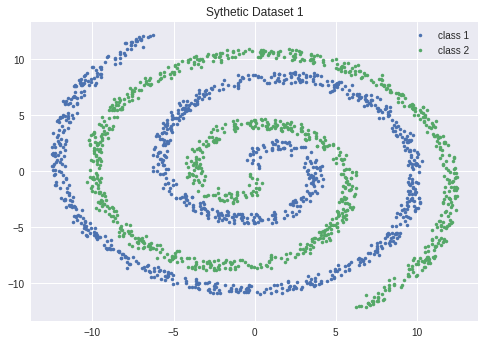

In [0]:
#Reference: https://glowingpython.blogspot.com/2017/04/solving-two-spirals-problem-with-keras.html
def dataset_spirals(samples=100):
    n = np.sqrt(np.random.rand(samples,1)) * 780 * (2*np.pi)/360
    f1x = -np.cos(n)*n + np.random.rand(samples,1) 
    f2x = np.sin(n)*n + np.random.rand(samples,1)
    return (np.vstack((np.hstack((f1x,f2x)),np.hstack((-f1x,-f2x)))), 
            np.hstack((np.zeros(samples),np.ones(samples))))

X, y = dataset_spirals(1000)

plt.title('Sythetic Dataset 1')
plt.plot(X[y==0,0], X[y==0,1], '.', label='class 1')
plt.plot(X[y==1,0], X[y==1,1], '.', label='class 2')
plt.legend()
plt.show()

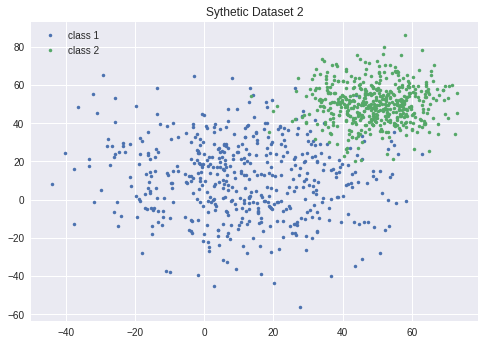

In [0]:
def normal_distrib_dataset(mean, std,samples):
    X = []
    y = []
    for i, (mean_curr, std_curr) in enumerate(zip(mean,std)):
      X.append(np.random.normal(loc=mean_curr, scale=std_curr, size=(samples, 2)))
      y += [i] * samples

    X = np.concatenate(X)
    y = np.array(y)
    return X, y

X, y = normal_distrib_dataset([10,50],[20,10],500)
plt.title('Sythetic Dataset 2')
plt.plot(X[y==0,0], X[y==0,1], '.', label='class 1')
plt.plot(X[y==1,0], X[y==1,1], '.', label='class 2')
plt.legend()
plt.show()

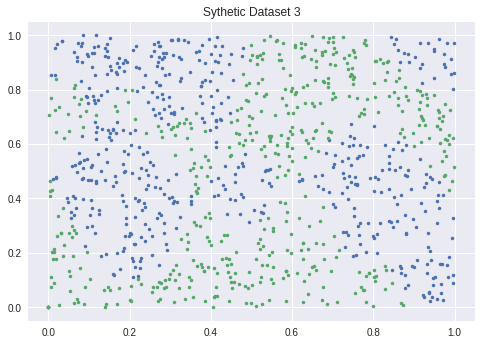

In [0]:
#Reference: https://github.com/Menelau/synthetic_datasets
def fancy_dataset(samples):
    sample_1 = samples //2
    sample_2 = samples-sample_1
    X_1 = np.zeros((sample_1, 2))
    X_2 = np.zeros((sample_2, 2))
    size_class1 = 0
    size_class2 = 0
    data = np.random.rand(samples, 2)
    for x in data:
        if (size_class1 + size_class2) >= samples * 2:
            break
        if x[1] > (-0.1 * (x[0] * 10) ** 2 + 0.6 * np.sin(4 * x[0] * 10) + 8.) / 10. and x[1] > (
                (x[0] * 10 - 2) ** 2 + 1) / 10 or \
                x[1] < (2 * np.sin(x[0] * 10) + 5) / 10 and x[1] > ((x[0] * 10 - 2) ** 2 + 1) / 10 or \
                x[1] < (-0.1 * (x[0] * 10) ** 2 + 0.6 * np.sin(4 * x[0] * 10) + 8) / 10 and x[1] < (
                (x[0] * 10 - 2) ** 2 + 1) / 10 and \
                x[1] > (2 * np.sin(x[0] * 10) + 5) / 10 or \
                x[1] > (-0.1 * (x[0] * 10) ** 2 + 0.6 * np.sin(4 * x[0] * 10) + 8) / 10 and x[1] < (
                2 * np.sin(x[0] * 10) + 5) / 10 or \
                x[1] > (((x[0] * 10 - 10) ** 2) / 2 + 7.902) / 10.:
            if size_class1 < sample_1:
                X_1[size_class1] = x
                size_class1 += 1
        elif size_class2 < sample_2:
            X_2[size_class2] = x
            size_class2 += 1

    y = np.hstack((np.zeros(sample_1), np.ones(sample_2)))
    X = np.vstack((X_1, X_2))

    return X, y
plt.title('Sythetic Dataset 3')
X, y = fancy_dataset(1000)
plt.plot(X[y==0,0], X[y==0,1],'.', label='class 1')
plt.plot(X[y==1,0], X[y==1,1],'.', label='class 2')
plt.show()

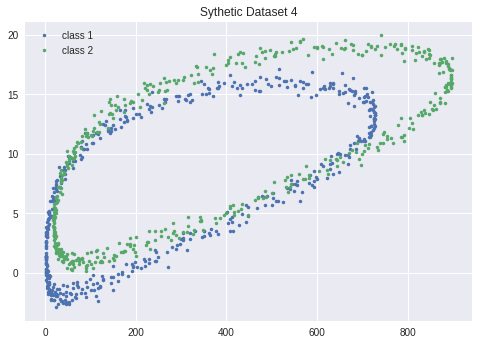

In [0]:
def circle_generator(samples=100,center1=[7.0,7.0],center2=[7.0,10.0],radius=[9.0,9.0],noise=0.5):
    X1=[]
    Y1=[]
    X2=[]
    Y2=[]
    rg= [2*i*math.pi/samples+np.random.random()*0.1 for i in range(samples)]
    for x in range(samples):
        x1 = radius[0]*math.cos(rg[x]) +center1[0]
        y1 = radius[0]*math.sin(rg[x]) +center1[1]
        x2 = radius[1]*math.cos(rg[x]) +center2[0]
        y2 = radius[1]*math.sin(rg[x]) +center2[1]
        X1.append(x1+np.random.normal(scale=[noise,])+((x1+y1)**2))
        Y1.append(y1+np.random.normal(scale=[noise,]))
        X2.append(x2+np.random.normal(scale=[noise,])+((x2+y2)**2))
        Y2.append(y2+np.random.normal(scale=[noise,]))
    return np.vstack([np.append(X1,X2),np.append(Y1,Y2)]).T ,np.hstack((np.zeros(samples),np.ones(samples)))

X, y = circle_generator(500)
plt.title('Sythetic Dataset 4')
plt.plot(X[y==0,0], X[y==0,1], '.', label='class 1')
plt.plot(X[y==1,0], X[y==1,1], '.', label='class 2')
plt.legend()
plt.show()
    

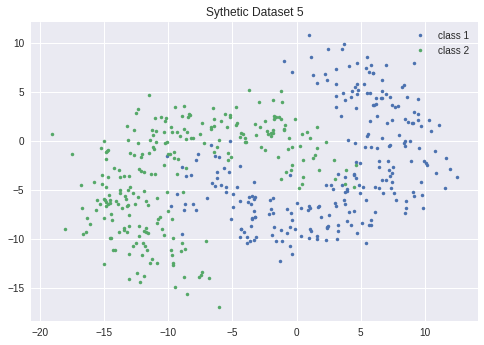

In [0]:
def generate_moons(samples, sigma=2):
    sample_1 = samples //2
    sample_2 = samples-sample_1
    moon_size = 8
    region_class_1 = 0.125 * np.pi + np.random.rand(sample_1) * 1.25 * np.pi
    data_class_1 = moon_size * np.transpose([np.sin(region_class_1), np.cos(region_class_1)]) + \
                   np.random.randn(sample_1, 2) * sigma

    region_class_2 = 0.375 * np.pi - np.random.rand(sample_2) * 1.25 * np.pi

    tmp = np.transpose([np.sin(region_class_2), np.cos(region_class_2)]) * moon_size

    data_class_2 = (tmp + np.random.randn(sample_2, 2) * sigma) + (np.ones((sample_2, 2)) * (-0.75 * moon_size))

    X = np.vstack((data_class_1, data_class_2))
    y = np.hstack((np.zeros(sample_1), np.ones(sample_2)))

    return X, y

X, y = generate_moons(500)
plt.title('Sythetic Dataset 5')
plt.plot(X[y==0,0], X[y==0,1], '.', label='class 1')
plt.plot(X[y==1,0], X[y==1,1], '.', label='class 2')
plt.legend()
plt.show()

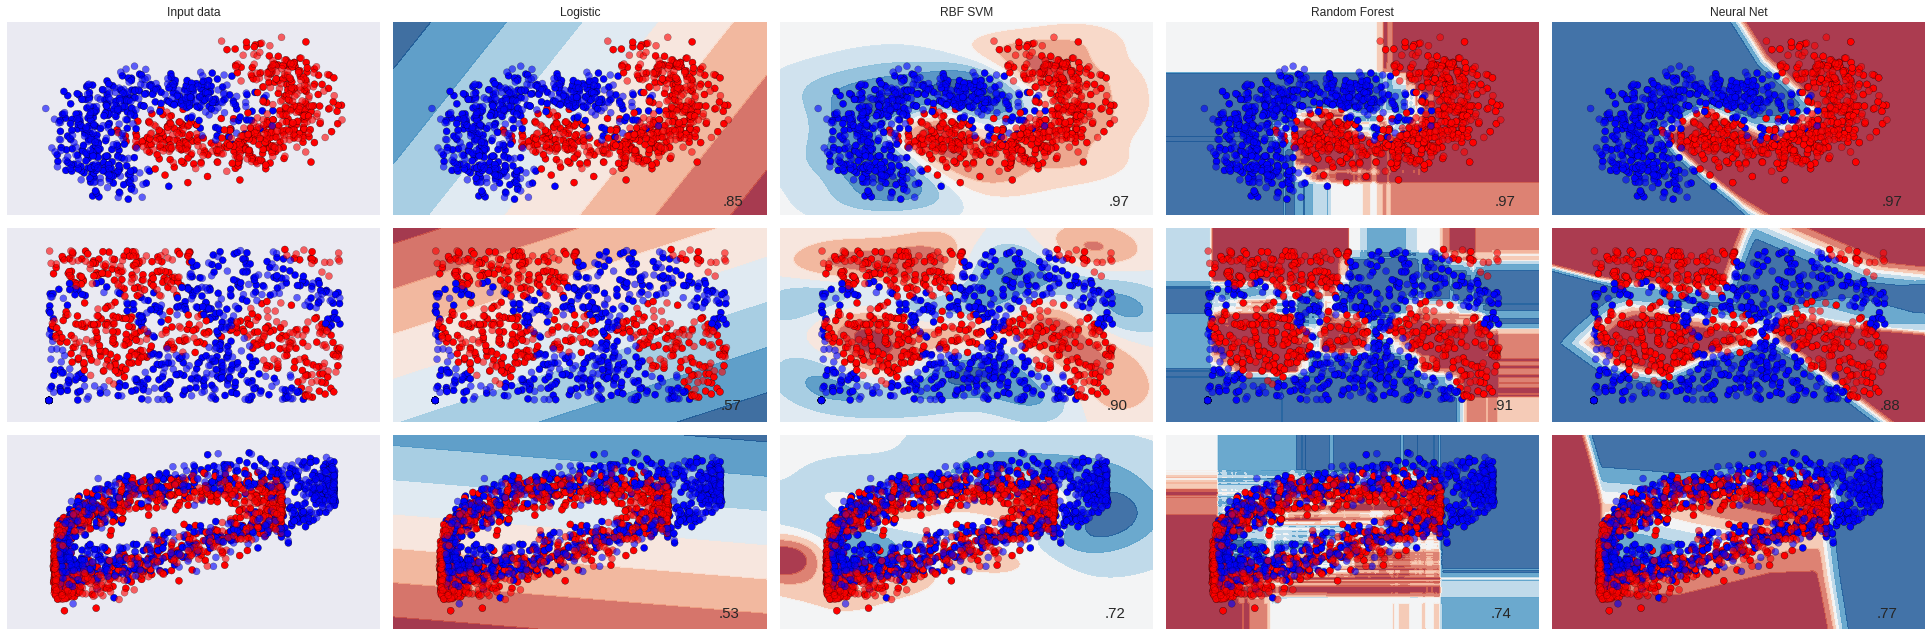

In [0]:
#Reference: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
h = .02  # step size in the mesh

names = ["Logistic", "RBF SVM","Random Forest", "Neural Net"]

classifiers = [
    LogisticRegression(solver='lbfgs', max_iter=200, multi_class='multinomial'),
    #SVC( C=0.025),
    SVC(gamma=2,kernel="rbf", C=1),
    RandomForestClassifier(max_depth=20, n_estimators=50),
    MLPClassifier(hidden_layer_sizes=(100,), activation='relu',max_iter=500, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=0.1),
    ]

n_samples=150

datasets = [generate_moons(1000),fancy_dataset(1000),circle_generator(1000,noise=2)]
figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=10)
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

<b>b.</b>

- In the first diagram above we can say that MLP performs better though it doesn't perform significantly better but it has better decision boundries in comparision to others so if we have more test points near the edge mlp will work fine.
- In the second dataset it is clearly seen that random forest performs better than rest of the models.
- In the third dataset when the classes are more overlapping it gets hard for neural nets as well to perform on it.

<b>c.</b> 

Through the decision boundries we can say that MLP tends to have more confident decision boundries out of all.
Random forest has more uncertain area because of no examples in that region so the trees are not train about those features.
SVM plots  decision boundary in such a way that the separation between the two classes/targets is as maximum as possible.